<a href="https://colab.research.google.com/github/Klearpixeloff/Yes-bank-stock-closing-price-prediction/blob/main/Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capston Project -2**

# SUPERVISED - REGRESSION

# **Project  - Yes bank stock closing price prediction**
**NAME** : ABHISHEK JAIN

**NAME** : KHUSHBOO CHAURASIYA

# Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.


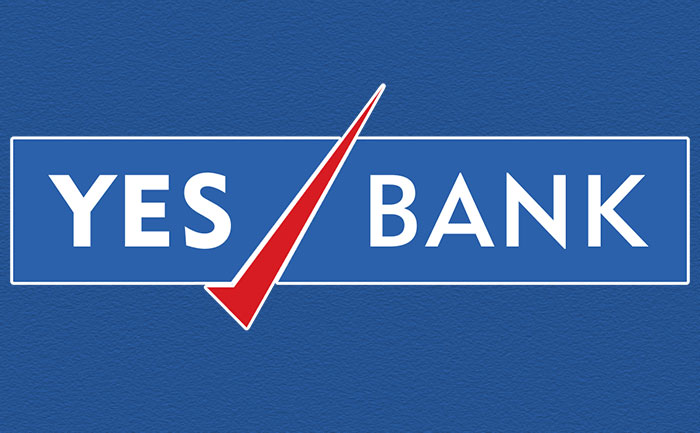



**Project Type - Linear Regression**






# importing libraries

In [709]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from scipy.stats import skew
from datetime import datetime 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (cross_val_score,TimeSeriesSplit)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge,        
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,                
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)
from statsmodels.stats.outliers_influence import variance_inflation_factor  

# Load the Data

In [710]:
df =pd.read_csv('drive/MyDrive/Data/yesbank.csv')

In [711]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# Description of Data

In [712]:
len(df)

185

In [713]:
df.shape

(185, 5)

In [714]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

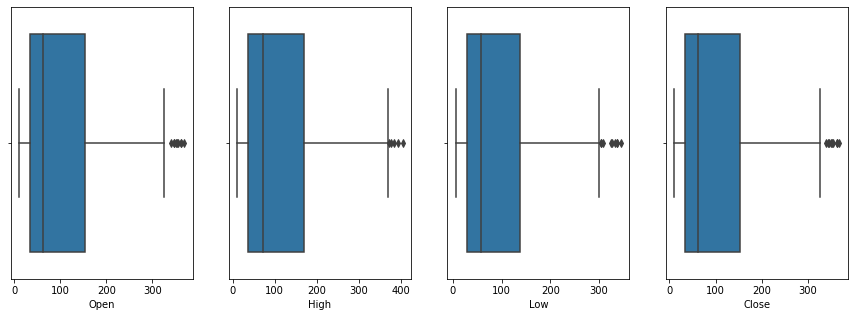

In [716]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(df['Open'])

plt.subplot(1,4,2)
sns.boxplot(df['High'])


plt.subplot(1,4,3)
sns.boxplot(df['Low'])

plt.subplot(1,4,4)
sns.boxplot(df['Close'])

plt.show()










/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


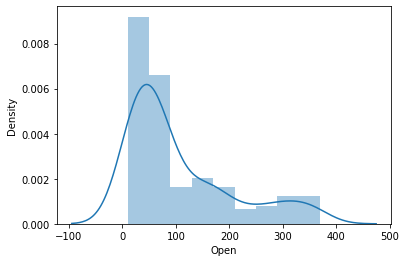

In [717]:

sns.distplot(df['Open'],kde='True')



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


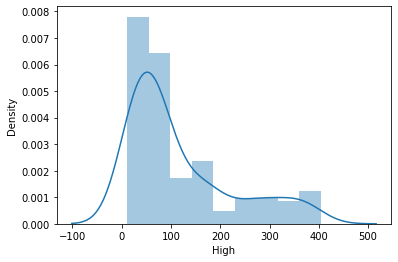

In [718]:
sns.distplot(df['High'],kde='True')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


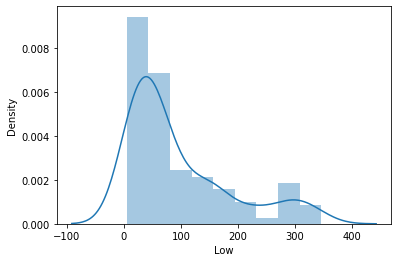

In [719]:
sns.distplot(df['Low'],kde='True')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


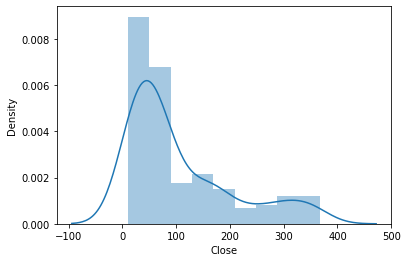

In [720]:

sns.distplot(df['Close'],kde=True)


# Bivariate Analysis

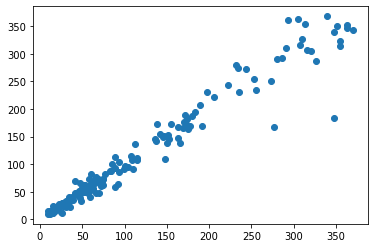

In [721]:
plt.scatter(df['Open'],df['Close'])

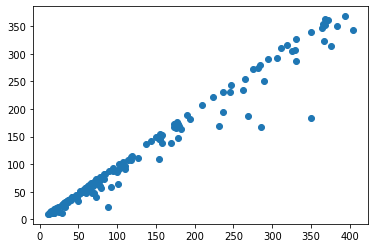

In [722]:
plt.scatter(df['High'],df['Close'])

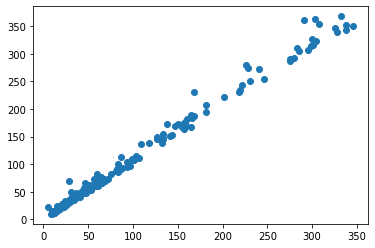

In [723]:
plt.scatter(df['Low'],df['Close'])

Every independent feature is extremely corelated with each other,as linear regression assumes there is no multi colinearity in the features.

# Data Cleaning

In [731]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [732]:
cd=np.log10(df[['Open','High','Low','Close']])

In [733]:
cd['Date'] = df['Date']

In [734]:
cd.head()

,Open,High,Low,Close,Date
0,1.113943,1.146128,1.051153,1.095518,Jul-05
1,1.099681,1.172603,1.098644,1.127753,Aug-05
2,1.129690,1.172311,1.088845,1.123852,Sep-05
3,1.120574,1.160469,1.093422,1.113609,Oct-05
4,1.125481,1.142389,1.109916,1.127429,Nov-05


In [735]:
cd['Date'] = pd.to_datetime(cd['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [736]:
cd.set_index('Date', inplace=True) 

In [737]:
cd.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,1.113943,1.146128,1.051153,1.095518
2005-08-01,1.099681,1.172603,1.098644,1.127753
2005-09-01,1.129690,1.172311,1.088845,1.123852
2005-10-01,1.120574,1.160469,1.093422,1.113609
2005-11-01,1.125481,1.142389,1.109916,1.127429


# EDA

In [738]:
cd.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,1.113943,1.146128,1.051153,1.095518
2005-08-01,1.099681,1.172603,1.098644,1.127753
2005-09-01,1.129690,1.172311,1.088845,1.123852
2005-10-01,1.120574,1.160469,1.093422,1.113609
2005-11-01,1.125481,1.142389,1.109916,1.127429


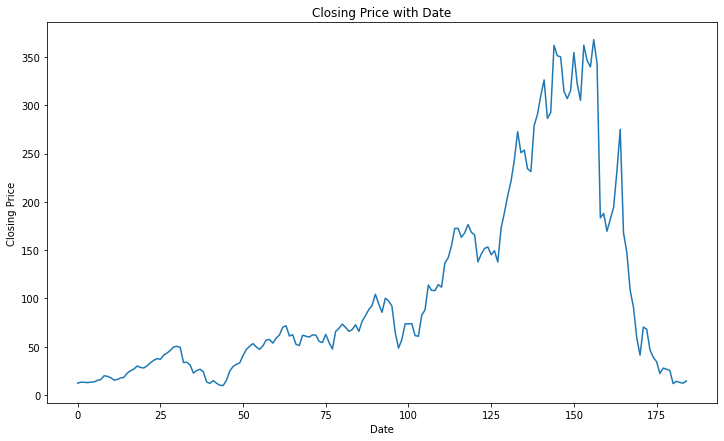

In [739]:
plt.figure(figsize=(12,7))
df['Close'].plot()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')
plt.show()

In [740]:
cd.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,1.113943,1.146128,1.051153,1.095518
2005-08-01,1.099681,1.172603,1.098644,1.127753
2005-09-01,1.129690,1.172311,1.088845,1.123852
2005-10-01,1.120574,1.160469,1.093422,1.113609
2005-11-01,1.125481,1.142389,1.109916,1.127429


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


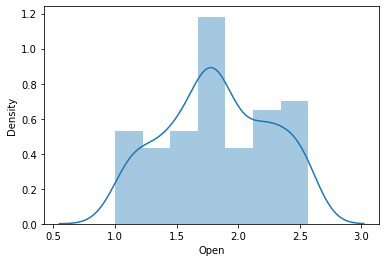

In [741]:
sns.distplot(cd['Open'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


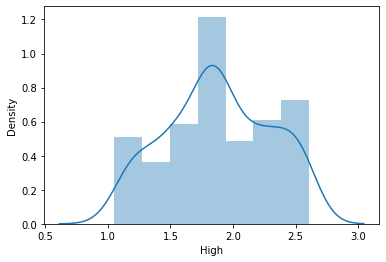

In [742]:
sns.distplot(cd['High'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


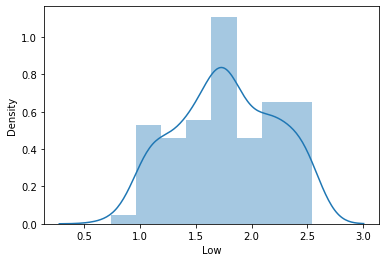

In [743]:
sns.distplot(cd['Low'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


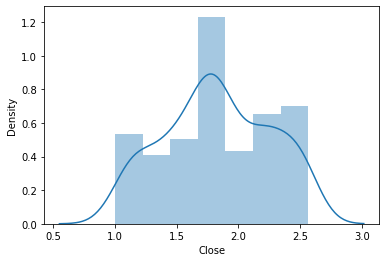

In [744]:
sns.distplot(cd['Close'])

guassian distribution

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


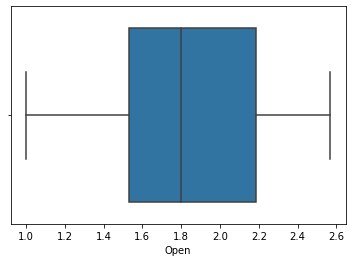

In [745]:
sns.boxplot(cd['Open'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


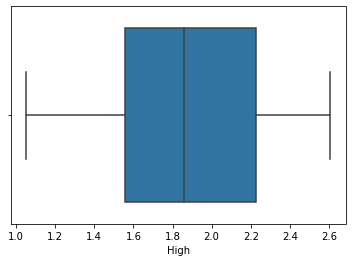

In [746]:
sns.boxplot(cd['High'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


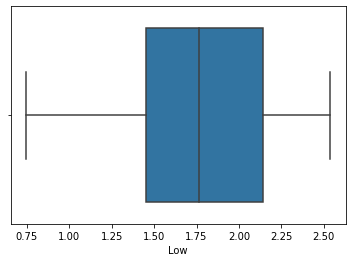

In [747]:
sns.boxplot(cd['Low'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


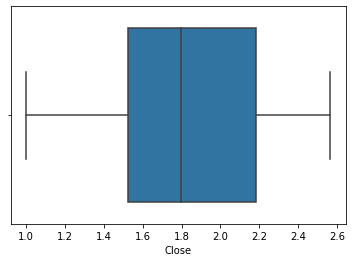

In [748]:
sns.boxplot(cd['Close'])

It's a small so dropping the outliers is not a good idea.

# Multicollinearity

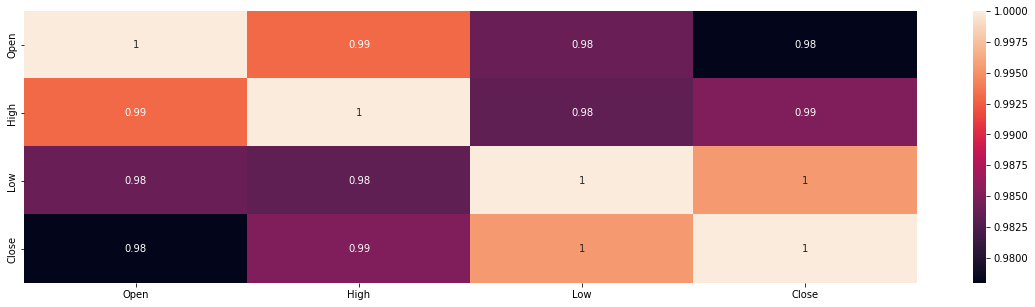

In [749]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)

In [750]:
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

In [751]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])
     

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


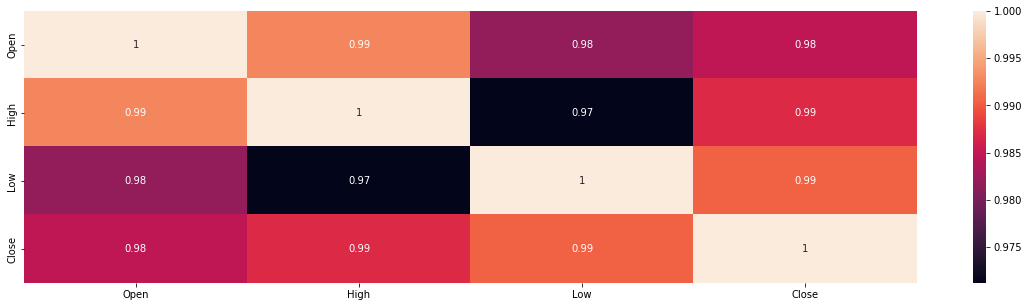

In [752]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(cd.corr(),annot=True)

In [753]:
calc_vif(cd[[i for i in cd.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,2116.460847
1,High,1265.381355
2,Low,482.390858


# Data Preprocessing

In [754]:
cd.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,1.113943,1.146128,1.051153,1.095518
2005-08-01,1.099681,1.172603,1.098644,1.127753
2005-09-01,1.129690,1.172311,1.088845,1.123852
2005-10-01,1.120574,1.160469,1.093422,1.113609
2005-11-01,1.125481,1.142389,1.109916,1.127429


In [755]:
dependent_variable = 'Close'
independent_variable = list(set(cd.columns.tolist())-{dependent_variable})

In [756]:
x=cd[independent_variable].values

In [757]:
x

array([[1.11394335, 1.14612804, 1.05115252],
       [1.09968064, 1.17260293, 1.09864373],
       [1.12968989, 1.17231097, 1.08884456],
       [1.12057393, 1.16046853, 1.09342169],
       [1.12548127, 1.14238947, 1.10991586],
       [1.13001195, 1.15956719, 1.11394335],
       [1.1360861 , 1.23451728, 1.13289977],
       [1.1903317 , 1.22968184, 1.18752072],
       [1.20951501, 1.32118403, 1.20466251],
       [1.31302311, 1.31806333, 1.25575479],
       [1.29666519, 1.33845649, 1.19865709],
       [1.26007139, 1.26481782, 1.1271048 ],
       [1.20411998, 1.23552845, 1.14050804],
       [1.20139712, 1.26951294, 1.19589965],
       [1.25527251, 1.27600199, 1.22530928],
       [1.27369559, 1.38381537, 1.26717173],
       [1.35793485, 1.45438747, 1.33041377],
       [1.40483372, 1.47217115, 1.38738983],
       [1.43775056, 1.53351786, 1.43136376],
       [1.48000694, 1.5132176 , 1.42813479],
       [1.46686762, 1.49941213, 1.36754227],
       [1.43136376, 1.50501424, 1.41830129],
       [1.

In [758]:
y=cd[dependent_variable].values

In [759]:
y

array([1.09551804, 1.12775252, 1.12385164, 1.11360915, 1.12742878,
       1.13703745, 1.18554215, 1.20736504, 1.30276371, 1.28981184,
       1.25599573, 1.19368103, 1.20844136, 1.25139485, 1.2662317 ,
       1.35755372, 1.4034637 , 1.43088095, 1.47943134, 1.45682135,
       1.44932409, 1.48158594, 1.52517443, 1.55606116, 1.57898284,
       1.56808433, 1.61658053, 1.63828954, 1.66445393, 1.69731654,
       1.70363524, 1.69390274, 1.52827378, 1.53224464, 1.49317912,
       1.3588862 , 1.40568779, 1.42862067, 1.38255732, 1.13289977,
       1.08849047, 1.17695898, 1.08778142, 1.01114736, 0.99913054,
       1.18892848, 1.40001964, 1.4724639 , 1.50419892, 1.52439612,
       1.61267792, 1.67495295, 1.70389295, 1.72762258, 1.69757803,
       1.67504474, 1.70731463, 1.75663611, 1.76019623, 1.73102438,
       1.7707784 , 1.79393001, 1.84695533, 1.85648721, 1.78682238,
       1.79615788, 1.72090317, 1.7100327 , 1.79225157, 1.7854722 ,
       1.77865763, 1.79504537, 1.79330135, 1.7451529 , 1.73639

In [760]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Features Scaling

In [761]:
sc= MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Linear Regression

In [762]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [763]:
y_pred = reg.predict(x_test)

In [764]:
x_test

array([[ 0.33915747,  0.30508207,  0.39612197],
       [ 0.75919541,  0.72908551,  0.77020706],
       [ 0.54125208,  0.50156525,  0.4822891 ],
       [ 0.72861217,  0.70846039,  0.76789694],
       [ 0.49548592,  0.49482502,  0.57220953],
       [ 0.27982572,  0.29148598,  0.3829495 ],
       [ 0.87928158,  0.86272962,  0.88880905],
       [ 0.12103791,  0.08864047,  0.24703982],
       [ 0.08232606,  0.04183088,  0.20603033],
       [ 0.80887124,  0.85224648,  0.84370932],
       [ 0.96546746,  0.94537034,  0.95348739],
       [ 0.66621415,  0.63212806,  0.65111138],
       [ 0.75687219,  0.73546953,  0.78820388],
       [ 0.50013912,  0.47074255,  0.55429299],
       [ 0.9882379 ,  0.96622733,  0.98693775],
       [ 0.87833275,  0.90278896,  0.90023603],
       [ 0.54481278,  0.52334584,  0.60728032],
       [ 0.25427621,  0.24380526,  0.36061268],
       [ 0.8752025 ,  0.90587494,  0.89757658],
       [ 0.46684875,  0.44287023,  0.51412064],
       [-0.00111266, -0.03080623,  0.093

In [765]:
reg.intercept_

0.8870482548617213

In [766]:
reg.coef_

array([-0.85498082,  1.23734697,  1.30428821])

In [767]:
#manually
demo = 0.8870482548617213 + -0.85498082*0.33915747 + 1.23734697*0.30508207 + 1.30428821*0.39612197

In [768]:
demo

1.4912247131607974

In [769]:
y_pred

array([1.4912247 , 2.14465448, 1.67394233, 2.14226908, 1.82201368,
       1.50794844, 2.36203842, 1.21545331, 1.1371433 , 2.35044359,
       2.47496559, 1.94884657, 2.17801307, 1.76486858, 2.52493353,
       2.42732103, 1.86087272, 1.44166154, 2.43034707, 1.70644715,
       0.97157347, 2.07290633, 2.1784174 , 1.76898738, 2.3338384 ,
       1.71921499, 2.40515731, 1.12251144, 2.02871592, 1.72293253,
       2.57183854, 2.55026271, 1.86725537, 2.22192748, 1.59041597,
       1.67502755, 2.41083039])

In [770]:
y_test

array([1.53224464, 2.16205634, 1.6716356 , 2.15253295, 1.79393001,
       1.47943134, 2.36410052, 1.20736504, 1.13703745, 2.2884728 ,
       2.48415742, 1.96047078, 2.18554215, 1.79504537, 2.53096768,
       2.43941165, 1.85648721, 1.42862067, 2.44575984, 1.69757803,
       0.99913054, 2.04805317, 2.17011497, 1.7707784 , 2.34498141,
       1.847881  , 2.39941411, 1.12742878, 2.0342674 , 1.72090317,
       2.53580029, 2.55866058, 1.88332068, 2.21301278, 1.61658053,
       1.67504474, 2.40401223])

# Model Evaluation

In [771]:
mse = mean_squared_error(10**(y_test),10**(y_pred))

In [772]:
mse

70.420406161454

In [773]:
mae = mean_absolute_error(10**(y_test),10**(y_pred))

In [774]:
mae

4.816779252269807

In [775]:
rmse = math.sqrt(mean_squared_error(10**(y_test),10**(y_pred)))

In [776]:
rmse

8.39168672922518

In [777]:
r2_score= r2_score(10**(y_test),10**(y_pred))

In [778]:
r2_score

0.9937436908107394

In [779]:
estimate = pd.DataFrame({'Mean squared error':[mse],'Root mean Sqaured Error': [rmse],'mean absolute error': [mae],'r2_score':[r2_score]})

In [780]:
estimate

,Mean squared error,Root mean Sqaured Error,mean absolute error,r2_score
0,70.420406,8.391687,4.816779,0.993744


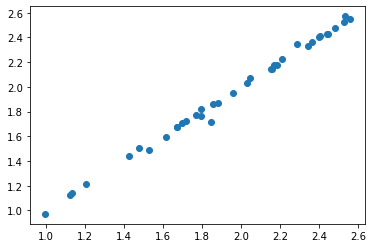

In [781]:
plt.scatter(y_test,y_pred)

# Regularization

# Ridge Regression

In [782]:
ridge =RidgeCV(cv=5)
ridge.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [783]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [784]:
y_pred = ridge.predict(x_test)

In [785]:
y_pred_train = ridge.predict(x_train)

In [786]:
y_pred_train

array([2.15894207, 1.26807736, 1.87541949, 1.73199398, 1.12322471,
       1.7721687 , 1.69988327, 1.58289902, 1.60747216, 1.23920143,
       1.96152212, 1.15154815, 1.57069734, 1.47428339, 2.49713809,
       1.85830513, 2.52341828, 1.39605863, 1.64320949, 1.7464857 ,
       2.52051537, 1.15225831, 2.00480014, 1.51474899, 2.04549673,
       1.83933216, 2.5348744 , 1.82375942, 2.01504361, 2.14738715,
       1.60090161, 1.96378588, 2.03906924, 2.13824408, 1.15887038,
       1.96573225, 1.82881305, 1.13666439, 1.75211154, 1.88924291,
       2.24890658, 1.05143975, 1.27116685, 2.00126714, 1.7550725 ,
       1.45414629, 2.08510138, 2.22298695, 2.08877003, 1.72991563,
       2.55940945, 1.39761353, 1.56351893, 2.17308467, 1.97698891,
       1.82601804, 2.28877246, 1.13651819, 1.81103917, 1.50795926,
       1.45994546, 1.8461399 , 1.23910572, 2.45399865, 1.52541507,
       1.13666774, 2.14555886, 1.4351842 , 1.33020323, 1.74404137,
       1.851598  , 1.68798002, 1.8504841 , 1.76136563, 1.13374

In [787]:
y_test

array([1.53224464, 2.16205634, 1.6716356 , 2.15253295, 1.79393001,
       1.47943134, 2.36410052, 1.20736504, 1.13703745, 2.2884728 ,
       2.48415742, 1.96047078, 2.18554215, 1.79504537, 2.53096768,
       2.43941165, 1.85648721, 1.42862067, 2.44575984, 1.69757803,
       0.99913054, 2.04805317, 2.17011497, 1.7707784 , 2.34498141,
       1.847881  , 2.39941411, 1.12742878, 2.0342674 , 1.72090317,
       2.53580029, 2.55866058, 1.88332068, 2.21301278, 1.61658053,
       1.67504474, 2.40401223])

In [788]:
y_pred

array([1.50700247, 2.15712946, 1.72321324, 2.14128829, 1.80740601,
       1.48649181, 2.36311748, 1.21599175, 1.14425223, 2.31410482,
       2.48168197, 1.97572249, 2.17922622, 1.77279957, 2.52823441,
       2.40258622, 1.86009531, 1.43187708, 2.40228181, 1.71508767,
       0.98592504, 2.06720225, 2.18443223, 1.75802745, 2.32578945,
       1.66554676, 2.40991254, 1.13405453, 2.03133739, 1.74843008,
       2.56457607, 2.51432246, 1.85190496, 2.22699574, 1.58794183,
       1.68352221, 2.40691996])

In [789]:
residual = y_train-y_pred_train

In [790]:
residual

array([ 3.01831322e-02,  3.46863459e-02, -6.41126546e-02, -1.14469441e-01,
        6.57037734e-02, -1.25008567e-02,  7.43136775e-03, -3.91617810e-03,
        9.61630769e-02, -1.61833524e-01, -2.84906255e-02, -3.26223948e-02,
       -3.22492917e-02, -1.74620446e-02,  1.62659752e-02,  7.74579600e-03,
        2.61366967e-02,  7.40507367e-03,  3.17434535e-02, -1.00891985e-02,
       -1.23224445e-02, -6.37678357e-02,  5.16854571e-02,  1.04254393e-02,
        1.26634719e-02, -6.48151913e-02,  4.45265963e-03,  7.66239213e-03,
       -2.60835443e-02,  1.67276707e-02,  3.73879278e-02,  3.94925408e-03,
       -4.12008954e-03,  3.60483727e-02, -1.41360769e-03,  3.54820772e-02,
        1.81422751e-02, -1.28127450e-02, -2.10871552e-02, -1.98938337e-02,
        2.69343588e-02, -4.02923918e-02, -1.51711259e-02,  1.74749591e-02,
       -9.91960336e-03, -2.52019988e-02, -4.88718334e-02,  2.38069697e-02,
        4.74112980e-02, -4.28327901e-02, -1.53414068e-02,  4.87682839e-02,
        4.91589900e-02,  

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


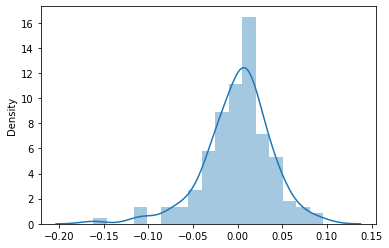

In [791]:
sns.distplot(residual,kde=True)

In [792]:
round(np.mean(residual))

0

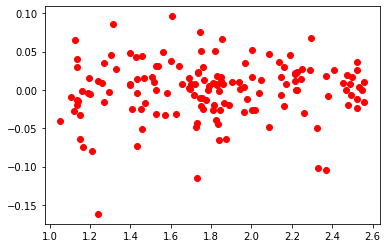

In [793]:
plt.scatter(y_pred_train,residual,color='red')
plt.show()

In [794]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(metrics.r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))


In [795]:
from sklearn import metrics

In [796]:
print_metrics(y_test, y_pred)

MSE is 0.0013281550291722683
RMSE is 0.036443861337298884
R2_score is 0.9928702040324446
MAE is 0.020993263313917657
MAPE is 1.11173875447298


In [797]:
def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-metrics.r2_score(actual, predicted)))

In [798]:
adjusted_r2(len(y_train),len(independent_variable), y_train, y_pred_train)

0.9918376891053512

# lasso Regression

In [799]:
lasso =LassoCV(cv=5)
lasso.fit(x_train,y_train)

LassoCV(cv=5)

In [800]:
y_pred = lasso.predict(x_test)

In [801]:
y_pred

array([1.49767515, 2.15041994, 1.69241992, 2.142887  , 1.81662809,
       1.49926536, 2.36340676, 1.21628247, 1.14056887, 2.33587421,
       2.47857111, 1.95958707, 2.17948697, 1.76864927, 2.52750606,
       2.41778441, 1.86134512, 1.43805268, 2.41935165, 1.71014226,
       0.97679122, 2.07115253, 2.18083487, 1.76514001, 2.33155722,
       1.6938355 , 2.40747229, 1.12788291, 2.03051373, 1.73328645,
       2.56958278, 2.53602514, 1.86142329, 2.22469466, 1.58980162,
       1.67901533, 2.41038702])

In [802]:
y_test

array([1.53224464, 2.16205634, 1.6716356 , 2.15253295, 1.79393001,
       1.47943134, 2.36410052, 1.20736504, 1.13703745, 2.2884728 ,
       2.48415742, 1.96047078, 2.18554215, 1.79504537, 2.53096768,
       2.43941165, 1.85648721, 1.42862067, 2.44575984, 1.69757803,
       0.99913054, 2.04805317, 2.17011497, 1.7707784 , 2.34498141,
       1.847881  , 2.39941411, 1.12742878, 2.0342674 , 1.72090317,
       2.53580029, 2.55866058, 1.88332068, 2.21301278, 1.61658053,
       1.67504474, 2.40401223])

In [803]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(metrics.r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [804]:
print_metrics(y_test, y_pred)

MSE is 0.0009643680409270595
RMSE is 0.03105427572697614
R2_score is 0.9948230837376522
MAE is 0.01832492394609967
MAPE is 0.9852846640648923


# Elasticnet Regression

In [805]:
elasticnet = ElasticNetCV(cv=5)
elasticnet.fit(x_train, y_train)

ElasticNetCV(cv=5)

In [806]:
y_pred = elasticnet.predict(x_test)

In [807]:
y_pred

array([1.50165448, 2.15374635, 1.70444589, 2.14290286, 1.81308562,
       1.49386071, 2.36392472, 1.21655896, 1.14248101, 2.32677786,
       2.48049873, 1.96631796, 2.18004757, 1.77078751, 2.52866326,
       2.4116939 , 1.86134874, 1.43567141, 2.41239537, 1.71236402,
       0.98023561, 2.06986279, 2.18235219, 1.76252973, 2.32978919,
       1.67941067, 2.40878003, 1.13094843, 2.03136355, 1.73970871,
       2.56794415, 2.52707628, 1.85765825, 2.22615903, 1.58927189,
       1.68128816, 2.40970288])

In [808]:
y_test

array([1.53224464, 2.16205634, 1.6716356 , 2.15253295, 1.79393001,
       1.47943134, 2.36410052, 1.20736504, 1.13703745, 2.2884728 ,
       2.48415742, 1.96047078, 2.18554215, 1.79504537, 2.53096768,
       2.43941165, 1.85648721, 1.42862067, 2.44575984, 1.69757803,
       0.99913054, 2.04805317, 2.17011497, 1.7707784 , 2.34498141,
       1.847881  , 2.39941411, 1.12742878, 2.0342674 , 1.72090317,
       2.53580029, 2.55866058, 1.88332068, 2.21301278, 1.61658053,
       1.67504474, 2.40401223])

In [809]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(metrics.r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [810]:
print_metrics(y_test, y_pred)

MSE is 0.0011075852193699546
RMSE is 0.033280402932806485
R2_score is 0.9940542659122337
MAE is 0.019422015892716884
MAPE is 1.039669395319218
